In [4]:
import pandas as pd         # do all processing in pandas, and convert Pandas DataFrame to R DataFrame

## imports required from rpy2
from rpy2.robjects import pandas2ri   
pandas2ri.activate()
%reload_ext rpy2.ipython

In [5]:

import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go

**Problem 2**

_**I chose Omair's plot for HW1 Problem 2:
The problem is approached by using heatmap where as I have used dynamic Choropleth Map with animation frame as time where one can easily pause to visualize pattern during particular time period .One thing that has made their plots less interpretable was the difficulty to identify distribution by country (speicified by 3-letter code) though all countries are represented.
Another distinction was I have used a simple line graph to show distribution across different continents which is also decent way of visualizing and also close to the expected results like continents such as Africa not performing as great as other ones such as Asia,America**_

**Problem 3**

_**I chose Devanshi Gariba's plot for HW1 Problem 2:
The problem is approached by using a simple line graph which is similar to mine and I have used dynamic Choropleth Map with animation frame as time where one can easily pause to visualize pattern during particular time period .
Although the plot is decently interpretable followed by a brief observations and analysis, my plots allow to hover over the plot to view the income for a particular country in a particular year which is more interesting.**_


**Problem 4**

In [6]:
life_exp_data=pd.read_csv('/Users/apoorvakasoju/Downloads/ddf--gapminder--systema_globalis-master/ddf--datapoints--life_expectancy_years--by--geo--time.csv').rename(columns={'life_expectancy_years':'life_expectancy'})

In [7]:
gdp_data=pd.read_csv('/Users/apoorvakasoju/Downloads/ddf--gapminder--systema_globalis-master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv').rename(columns={'income_per_person_gdppercapita_ppp_inflation_adjusted':'gdp_income'})
gdp_data['geo']=gdp_data['geo'].astype(str).str.upper()

In [8]:
#reading continent_country_info
continent_data=pd.read_csv('/Users/apoorvakasoju/Downloads/country-and-continent-codes-list.csv')
continent_data.drop(columns=['Two_Letter_Country_Code','Country_Number'],axis=1,inplace=True)
continent_data=continent_data[~continent_data['Three_Letter_Country_Code'].isnull()]
continent_data.drop_duplicates(subset=['Three_Letter_Country_Code'],inplace=True)

In [9]:
life_exp_data['geo']=life_exp_data['geo'].astype(str).str.upper()

In [10]:
#Let us divide countries based on improvement of life expectancy based on level of GDP income .
poor_countries =["Somalia, Somali Republic", "Congo, Democratic Republic of the", "Mozambique, Republic of", "Ethiopia, Federal Democratic Republic of"]
mid_lower_countries =["Bangladesh, People's Republic of", "Kenya, Republic of", "Cameroon, Republic of", "India, Republic of"]
mid_upper_countries =["Indonesia, Republic of", "China, People's Republic of", "Brazil, Federative Republic of", "Russian Federation"]
rich_countries=["United States of America", "Japan", "Switzerland, Swiss Confederation", "United Kingdom of Great Britain & Northern Ireland"]

In [11]:
gdp_with_continent2=gdp_data.join(continent_data.set_index('Three_Letter_Country_Code'), on='geo',how='left')

In [12]:
gdp_life_exp=gdp_with_continent2.merge(life_exp_data,on=['geo', 'time'],how='left')

Group the data by time and average life_expectancy and gdp_income across all countries

In [13]:
gdp_life_exp_grouped=gdp_life_exp.groupby('time').agg({'life_expectancy' : 'mean',
                     'gdp_income' : 'mean'})

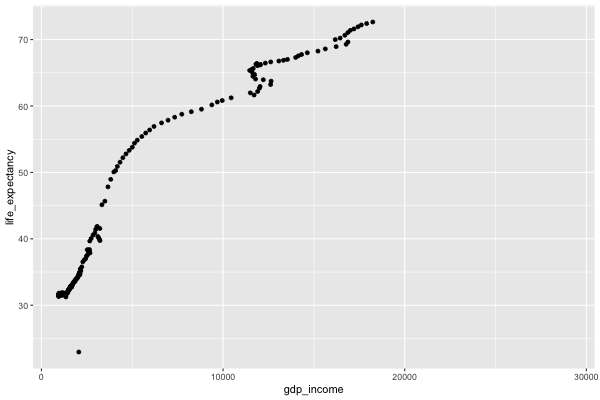

In [14]:
%%R -i gdp_life_exp_grouped -w 600 -h 400
library(ggplot2)
ggplot(gdp_life_exp_grouped, aes(x = gdp_income, y = life_expectancy)) +
    geom_point()

_*Fitting linear regression to our data and adding a regression line to our plot and displaying all model measures*_

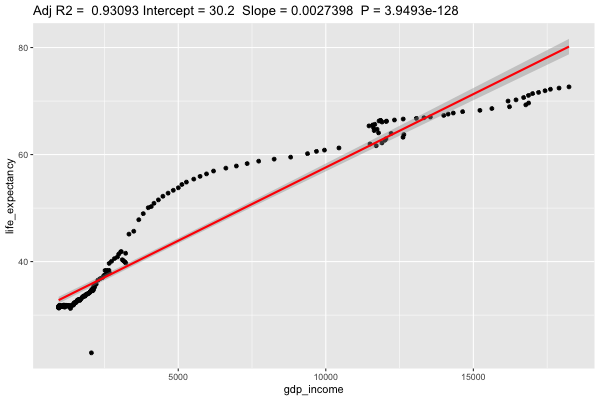

In [15]:
%%R -i gdp_life_exp_grouped -w 600 -h 400
library(ggplot2)
ggplotRegression <- function (fit) {

require(ggplot2)

ggplot(fit$model, aes_string(x = names(fit$model)[2], y = names(fit$model)[1])) + 
  geom_point() +
  stat_smooth(method = "lm", col = "red") +
  labs(title = paste("Adj R2 = ",signif(summary(fit)$adj.r.squared, 5),
                     "Intercept =",signif(fit$coef[[1]],5 ),
                     " Slope =",signif(fit$coef[[2]], 5),
                     " P =",signif(summary(fit)$coef[2,4], 5)))
}
ggplotRegression(lm(life_expectancy ~ gdp_income, data = gdp_life_exp_grouped))

*From the fitted line plot, we understand that the regression line does not fit the data , so lets use a log transformation on gdp_income.Adding a regression line to our plot using transformation and displaying all model measures*

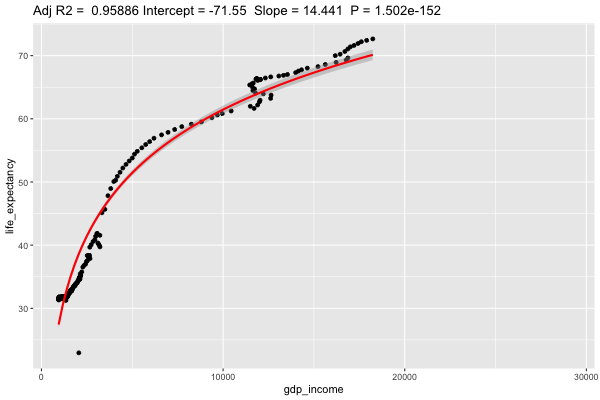

In [16]:
%%R -i gdp_life_exp_grouped -w 600 -h 400
library(ggplot2)
ggplotRegression <- function (df) {

require(ggplot2)
fit=lm(life_expectancy ~ log(gdp_income), data = df)
ggplot(df, aes(x = gdp_income, y = life_expectancy)) + 
  geom_point() + 
  stat_smooth(method = "lm", col = "red",formula = y ~ log(x)) +
  labs(title = paste("Adj R2 = ",signif(summary(fit)$adj.r.squared, 5),
                     "Intercept =",signif(fit$coef[[1]],5 ),
                     " Slope =",signif(fit$coef[[2]], 5),
                     " P =",signif(summary(fit)$coef[2,4], 5)))
}
ggplotRegression( gdp_life_exp_grouped)

*From the fitted line plot, now the regression line explains the data more closely and also Adjusted R2 score is also improved  but lets see if any polynomial order fit does better  , so lets use a polynomial transformation on gdp_income.Adding a regression line to our plot using transformation and displaying all model measures*

                     Estimate   Std. Error   t value      Pr(>|t|)
(Intercept)      2.561794e+01 2.919333e-01  87.75271 6.597148e-171
gdp_income       5.427103e-03 1.288990e-04  42.10354 4.308013e-106
I(gdp_income^2) -1.679713e-07 7.854825e-09 -21.38447  3.104916e-55


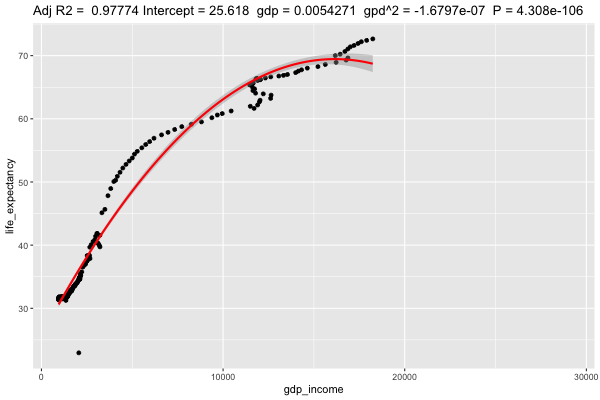

In [17]:
%%R -i gdp_life_exp_grouped -w 600 -h 400
library(ggplot2)
ggplotRegression <- function (df) {

require(ggplot2)

fit<-lm(formula=life_expectancy ~ gdp_income + I(gdp_income^2), data = df)
print(summary(fit)$coef)
ggplot(gdp_life_exp_grouped, aes(x = gdp_income, y = life_expectancy)) + 
  geom_point() + 
  stat_smooth(method = "lm", col = "red",formula = y ~ x+I(x^2)) +          
  labs(title = paste("Adj R2 = ",signif(summary(fit)$adj.r.squared, 5),
                     "Intercept =",signif(fit$coef[[1]],5 ),
                     " gdp =",signif(fit$coef[[2]], 5),
                     " gpd^2 =",signif(fit$coef[[3]], 5),
                     " P =",signif(summary(fit)$coef[2,4], 5)))
}
ggplotRegression(gdp_life_exp_grouped)

*From the fitted line plot, although the adjusted R2 is increased more but the second order predictor(gdp_income^2) has negative coefficient*

**Problem 5**

In [18]:
child_mortality_data=pd.read_csv('/Users/apoorvakasoju/Downloads/ddf--gapminder--systema_globalis-master/ddf--datapoints--child_mortality_0_5_year_olds_more_years_version_7--by--geo--time.csv').rename(columns={'child_mortality_0_5_year_olds_more_years_version_7':'child_mortality'})

In [19]:
child_mortality_data['geo']=child_mortality_data['geo'].astype(str).str.upper()

In [20]:
gdp_child_mortality=gdp_with_continent2.merge(child_mortality_data,on=['geo', 'time'],how='left')

In [21]:
gdp_child_mortality.head(10)

,geo,time,gdp_income,Continent_Name,Continent_Code,Country_Name,child_mortality
0,AFG,1800,603,Asia,AS,"Afghanistan, Islamic Republic of",468.6
1,AFG,1801,603,Asia,AS,"Afghanistan, Islamic Republic of",468.6
2,AFG,1802,603,Asia,AS,"Afghanistan, Islamic Republic of",468.6
3,AFG,1803,603,Asia,AS,"Afghanistan, Islamic Republic of",468.6
4,AFG,1804,603,Asia,AS,"Afghanistan, Islamic Republic of",468.6
5,AFG,1805,603,Asia,AS,"Afghanistan, Islamic Republic of",468.6
6,AFG,1806,603,Asia,AS,"Afghanistan, Islamic Republic of",470.0
7,AFG,1807,603,Asia,AS,"Afghanistan, Islamic Republic of",470.0
8,AFG,1808,603,Asia,AS,"Afghanistan, Islamic Republic of",470.0
9,AFG,1809,603,Asia,AS,"Afghanistan, Islamic Republic of",470.0


In [22]:
gdp_child_mortality_grouped=gdp_child_mortality.groupby('time').agg({'gdp_income' : 'mean',
                     'child_mortality' : 'mean'})

*Lets visualize the relation between gdp_income and child_mortality rates*

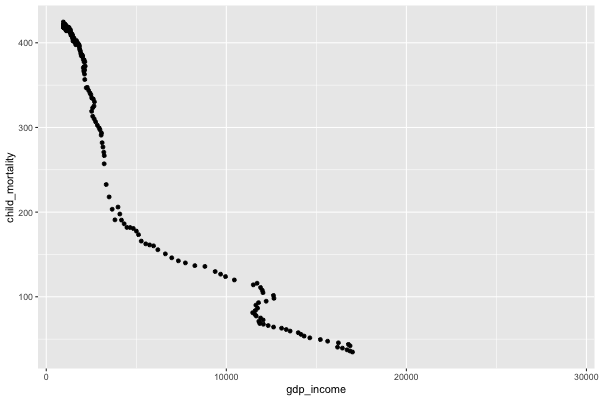

In [23]:
%%R -i gdp_child_mortality_grouped -w 600 -h 400
library(ggplot2)
ggplot(gdp_child_mortality_grouped, aes(x = gdp_income, y = child_mortality)) +
    geom_point()

*We observe that as gdp_income increase the child mortatility rate decrease which is natural to our intuition as living standards improve so is decrease in deaths due to malnutrition,premature births .Lets explore more deeply this relation by fitting appropriate model*

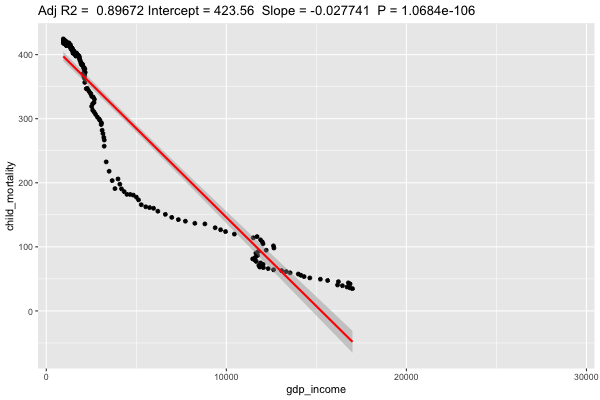

In [24]:
%%R -i gdp_child_mortality_grouped -w 600 -h 400
library(ggplot2)
ggplotRegression <- function (df) {

require(ggplot2)
fit=lm(child_mortality ~ gdp_income, data = df)
ggplot(df, aes(x = gdp_income, y = child_mortality)) + 
  geom_point() + 
  stat_smooth(method = "lm", col = "red",formula = y ~ x) +
  labs(title = paste("Adj R2 = ",signif(summary(fit)$adj.r.squared, 5),
                     "Intercept =",signif(fit$coef[[1]],5 ),
                     " Slope =",signif(fit$coef[[2]], 5),
                     " P =",signif(summary(fit)$coef[2,4], 5)))
}
ggplotRegression( gdp_child_mortality_grouped)

*A simple linear regression model does not seem to fit the data .Lets explore using a log transformationon gdp_income*

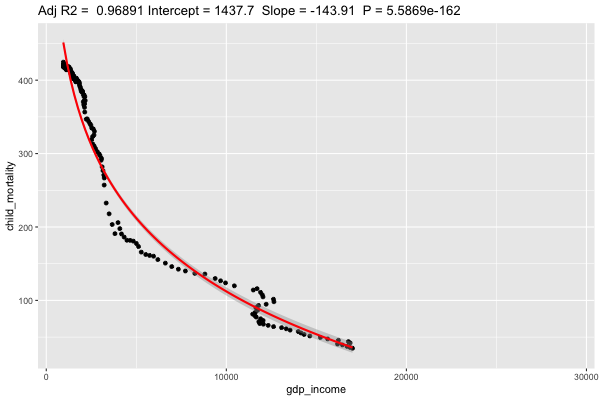

In [25]:
%%R -i gdp_child_mortality_grouped -w 600 -h 400
library(ggplot2)
ggplotRegression <- function (df) {

require(ggplot2)
fit=lm(child_mortality ~ log(gdp_income), data = df)
ggplot(df, aes(x = gdp_income, y = child_mortality)) + 
  geom_point() + 
  stat_smooth(method = "lm", col = "red",formula = y ~ log(x)) +
  labs(title = paste("Adj R2 = ",signif(summary(fit)$adj.r.squared, 5),
                     "Intercept =",signif(fit$coef[[1]],5 ),
                     " Slope =",signif(fit$coef[[2]], 5),
                     " P =",signif(summary(fit)$coef[2,4], 5)))
}
ggplotRegression( gdp_child_mortality_grouped)

*From the fitted line plot, although the adjusted R2 seems to have significantly improved  more but  predictor(gdp_income) has negative coefficient which seems to fit the relation*